In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
df.shape[0] #shape[1] - columns

1000

In [5]:
pd.Series([np.nan]).sum() # gap

0.0

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df = df[['gender', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]

In [9]:
def replacemet_gender(information):
    if information == 'male':
        return 1        
    else:        #elif emotioin == 'female': return 0
        return 0
    
df['gender'] = df['gender'].apply(lambda x:replacemet_gender(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
def replacemet_course(information):
    if information == 'completed':
        return 1        
    else:        #elif emotioin == 'none': return 0
        return 0

df['test preparation course'] = df['test preparation course'].apply(lambda x:replacemet_course(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
def replacemet_lunch(information):
    if information == 'standard':
        return 1        
    else:        #elif emotioin == 'none': return 0
        return 0

df['lunch'] = df['lunch'].apply(lambda x:replacemet_lunch(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


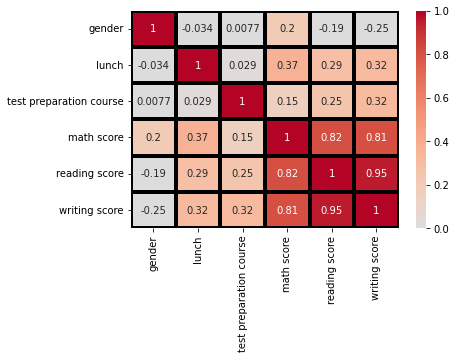

In [12]:
sns.heatmap(df.corr(), annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   1000 non-null   int64
 1   lunch                    1000 non-null   int64
 2   test preparation course  1000 non-null   int64
 3   math score               1000 non-null   int64
 4   reading score            1000 non-null   int64
 5   writing score            1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


# **KNN**

In [14]:
x = df.drop(['gender'], axis=1)
y = df['gender']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred_KNN = knn.predict(scaled_X_test)

In [21]:
print(confusion_matrix(y_test, y_pred_KNN))

[[80 15]
 [12 93]]


In [22]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        95
           1       0.86      0.89      0.87       105

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [23]:
print(accuracy_score(y_test, y_pred_KNN))

0.865


In [24]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

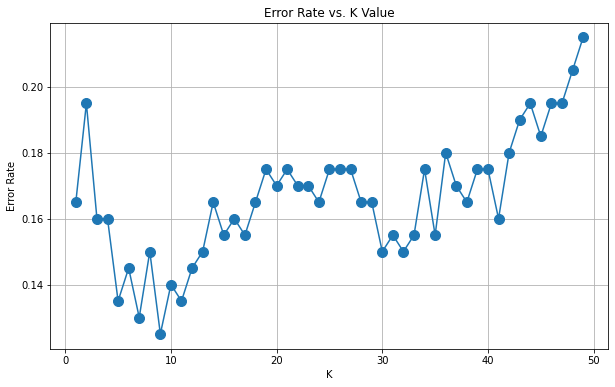

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [26]:
knn = KNeighborsClassifier(n_neighbors=11) # Optimal n_neighbors = [11, 12]

knn.fit(scaled_X_train,y_train)
y_pred_KNN_best = knn.predict(scaled_X_test)

print(confusion_matrix(y_test, y_pred_KNN_best))
print()
print(classification_report(y_test, y_pred_KNN_best))

[[80 15]
 [12 93]]

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        95
           1       0.86      0.89      0.87       105

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



# **Decision Tree**

In [27]:
# x = df.drop(['gender'], axis = 1)
# y = df['gender']

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [29]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf_DecisionTree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf_DecisionTree.fit(X_train, y_train)
print(clf_DecisionTree.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'splitter': 'best'}


In [30]:
clf_DecisionTree_best = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=None, splitter='best')
clf_DecisionTree_best.fit(X_train, y_train)
y_pred_DecisionTree = clf_DecisionTree_best.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_DecisionTree))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.81      0.81      0.81       105

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [32]:
print(confusion_matrix(y_test, y_pred_DecisionTree))

[[75 20]
 [20 85]]


In [33]:
df.columns

Index(['gender', 'lunch', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')

In [34]:
# plt.figure(figsize = (50, 50))
# plot_tree(model, feature_names = ['lunch', 'test preparation course', 'math score',
#        'reading score', 'writing score'], 
#           class_names = ['0', '1'], filled = True)
# plt.show()

# **SVM**

In [35]:
# x = df.drop(['gender'], axis = 1)
# y = df['gender']

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [38]:
scaled_X_test

array([[ 0.73783572, -0.69784586,  0.76182456,  1.36425321,  1.63305128],
       [ 0.73783572,  1.4329812 ,  1.08707786,  0.34380575,  0.28348851],
       [ 0.73783572,  1.4329812 ,  0.24141927,  0.41183558,  0.47628319],
       [ 0.73783572, -0.69784586, -1.05959396, -1.56102949, -1.25886894],
       [ 0.73783572, -0.69784586,  0.43657125,  0.27577592,  0.15495873],
       [ 0.73783572, -0.69784586, -0.86444197,  0.20774609, -0.10210085],
       [ 0.73783572, -0.69784586,  0.24141927,  0.27577592, -0.10210085],
       [-1.35531525, -0.69784586,  1.0220272 ,  1.77243219,  1.63305128],
       [ 0.73783572,  1.4329812 , -0.27898602, -0.26846272, -0.03783596],
       [-1.35531525, -0.69784586,  0.30646993,  0.82001456,  0.60481298],
       [ 0.73783572,  1.4329812 ,  0.37152059,  1.29622338,  1.56878639],
       [ 0.73783572, -0.69784586, -0.08383404,  0.27577592,  0.86187256],
       [ 0.73783572, -0.69784586,  0.82687522,  0.61592507,  0.60481298],
       [ 0.73783572, -0.69784586,  0.1

In [39]:
model = SVC(C=1, gamma = 1, kernel = 'rbf')

In [40]:
model.fit(scaled_X_train,y_train)

SVC(C=1, gamma=1)

In [41]:
y_pred = model.predict(scaled_X_test)

In [42]:
print(confusion_matrix(y_test, y_pred))


[[82 13]
 [12 93]]


In [43]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.86      0.87        95
           1       0.88      0.89      0.88       105

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200



In [44]:
params = {
    'C':  [0.1, 1, 10, 100, 1000],
    'gamma':  [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf'],
}

grid = GridSearchCV(
    SVC(),
    params,
    refit = True
)

grid.fit(scaled_X_train,y_train)
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [45]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [46]:
grid_predictions = grid.predict(scaled_X_test)

In [47]:
print(confusion_matrix(y_test,grid_predictions))

[[80 15]
 [10 95]]


In [48]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        95
           1       0.86      0.90      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



# **Random Forest**

In [49]:
# x = df.drop(['gender'], axis = 1)
# y = df['gender']

In [50]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [51]:
clf_randomForest = RandomForestClassifier(n_estimators=1000, max_features=3, verbose=True)
clf_randomForest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.3s finished


RandomForestClassifier(max_features=3, n_estimators=1000, verbose=True)

In [52]:
y_pred_RandomForest = clf_randomForest.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.5s finished


In [53]:
print(classification_report(y_test, y_pred_RandomForest))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        95
           1       0.86      0.90      0.88       105

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [54]:
print(confusion_matrix(y_test, y_pred_RandomForest))

[[79 16]
 [10 95]]


# **AdaBoost**

In [55]:
# x = df.drop(['gender'], axis = 1)
# y = df['gender']

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [57]:
clf_AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [58]:
y_pred_AdaBoost = clf_AdaBoost.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred_AdaBoost))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        95
           1       0.88      0.90      0.89       105

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [60]:
print(confusion_matrix(y_test, y_pred_AdaBoost))

[[82 13]
 [10 95]]
